# Aufgabe 3 – Fragestellungen und Zielvariablen begrenzen die Methodenauswahl

# Aufgabe 3a)

**Aufgabenstellung**

Untersuchen Sie die Art der Variablen und die Verteilung der Zielvariablen. Gegebenenfalls ist eine Datenvorverarbeitung nötig. Nennen Sie die möglichen Methoden. Wählen Sie eine Methode aus und begründen Sie Ihre Auswahl. Bitte separieren Sie die Datensätze mit 80% : 20% = Training : Test und führen Sie die Methode ohne Parameteroptimierung aus. Vergleichen Sie die Ergebnisse mit denen von vorgegebenen Methode(n).

Der Datensatz `employment_08_09.xlsx` beinhaltet die sozioökonomischen Daten der Arbeitskräfte in den USA im April 2008 und Angaben, ob sie im April 2009 weiterhin angestellt sind. Alle Befragten waren im April 2008 angestellt. Sagen Sie basierend auf den 2008er Informationen vorher, welche Arbeitskraft 2009 arbeitslos wird. Haben ältere Arbeitskräfte ein höheres Risiko für Arbeitslosigkeit während der Finanzkrise 2008-2009?

**Vorgehen**

1. Modul-Importe und Einstellungen
- Einlesen des Datensatzes
- Untersuchung der Merkmale
- Verteilung der Zielvariable
- Datenvorverarbeitung
- Training und Modellauswahl
- Schlussfolgerungen

**Zusammenfassung der Ergebnisse**

Der Datensatz ist stark unbalanciert, was das Training erschwert. Nach eingehender Analyse ist das Ergebnis, dass ältere Arbeitskräfte _kein_ höheres Risiko für Arbeitslosigkeit während der Finanzkrise haben.

## Modul-Importe und Einstellungen

In diesem Abschnitt werden die benötigten Python-Module mithilfe von `import` importiert.

In [46]:
# Set Module Path
import sys
sys.path.append('./module')

# Own Modules
import one_hot

# Common Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# SimpleImputer from sklearn (Can replace missing values)
from sklearn.impute import SimpleImputer

# Import train_test_split from sklearn (Can do splitting)
from sklearn.model_selection import train_test_split

# Import Scalers from sklearn (Can do feature scaling)
from sklearn.preprocessing import StandardScaler, RobustScaler

# Metrics
from sklearn.metrics import accuracy_score, balanced_accuracy_score, confusion_matrix

# Classifiers
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

## Einlesen des Datensatzes

In diesem Abschnitt wird der Datensatz als Excel-Datei (`.xlsx`) mithilfe von `pandas` eingelesen.

In [47]:
# Load dataset from Excel file
data = pd.read_excel('./data/employment_08_09.xlsx')

## Untersuchung der Merkmale

In der [Beschreibung des Datensatzes](./data/employment_08_09_description.pdf) wird unter anderem folgende Information gegeben:

"These data file contains data on 5412 workers who were survey in the April 2008 Current Population Survey and reported that they were employed. The data file contains their employment status in April 2009, one year later, along with some additional variables."

Zunächst soll überprüft werden, ob der Datensatz vollständig geladen wurde.

In [48]:
# Get info on Datasat
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5412 entries, 0 to 5411
Data columns (total 21 columns):
age             5412 non-null int64
race            5412 non-null int64
earnwke         4773 non-null float64
employed        5412 non-null int64
unemployed      5412 non-null int64
married         5412 non-null int64
union           5412 non-null int64
ne_states       5412 non-null int64
so_states       5412 non-null int64
ce_states       5412 non-null int64
we_states       5412 non-null int64
government      5412 non-null int64
private         5412 non-null int64
self            5412 non-null int64
educ_lths       5412 non-null int64
educ_hs         5412 non-null int64
educ_somecol    5412 non-null int64
educ_aa         5412 non-null int64
educ_bac        5412 non-null int64
educ_adv        5412 non-null int64
female          5412 non-null int64
dtypes: float64(1), int64(20)
memory usage: 888.0 KB


Anmerkungen: 
- Alle 5412 Datensätze wurden geladen und 
- Es gibt nur in der Spalte `earnwke` fehlende Werte

#### Beschreibung und Einordnung der Merkamle

Die [Beschreibung des Datensatzes](./data/employment_08_09_description.pdf) enhält zudem Informationen zur Bedeutung der Spalten. In der folgenden Zelle ist diese mit einer Einordnung der Merkmale angereichert.

- Beschäftigungsstatus des Arbeiters im Jahr 2009 (_Zielvariable_): Kategorisch-Nominal
    - `employed`: Integer (= 1, wenn im Jahr 2009 noch angestellt)
    - `unemployed`: Integer (= 1, wenn im Jahr 2009 nicht mehr angestellt)
    
Informationen über den Arbeiter im Jahr 2008:

- Alter: Numerisch-Kontinuierlich
    - `age`: Integer

- Geschlecht: Kategorisch-Nominal
    - `female`: Integer (= 1, wenn weiblich)

- Familienstand: Kategorisch-Nominal
    - `married`: Integer (= 1, wenn Verheiratet)

- Selbst-Identifizierte Rasse, Kategorisch-Nominal
    - `race`: Integer (weiß=1, schwarz=2, andere=3)

- Gewerkschaftszugehörigkeit: Kategorisch-Nominal
    - `union`: Integer (= 1, wenn Gewerkschaftsmitglied)

- Bundesstaats-Angehörigkeit: Kategorisch-Nominal
    - `ne_states`: Integer (= 1, wenn von Nordost-Staat)
    - `so_states`: Integer (= 1, wenn von Südstaat)
    - `ce_states`: Integer (= 1, wenn von zentralem Staat)
    - `we_states`: Integer (= 1, wenn von Weststaat)

- Angestelltenverhältnis: Kategorisch-Nominal
    - `private`: Integer (= 1, wenn angestellt in privatem Betrieb)
    - `government`: Integer (= 1, wenn angestellt von der Regierung)
    - `self`: Integer (= 1, wenn selbstständig)

- Höchster Abschluss: Kategorisch-Ordinal
    - `educ_lths`: Integer (= 1, wenn höchster Abschluss niedriger als High-School)
    - `educ_hs`: Integer (= 1, wenn höchster Abschluss ist High-School)
    - `educ_somecol`: Integer (= 1, wenn höchster Abschluss ist College)
    - `educ_aa`: Integer (= 1, wenn höchster Abschluss ist AA)
    - `educ_ba`: Integer (= 1, wenn höchster Abschluss ist BA oder BS)
    - `educ_adv`: Integer (= 1, wenn höchster Abschluss fortgeschritten)

- Durschnittliches wöchentliches Einkommen: Numerisch-Kontinuierlich
    - `earnwke`: Float




#### Untersuchung der Verteilung der numerisch-kontinuierlichen Merkamle

Im Folgenden soll die Verteilung der kontinuierlichen Merkmale mithilfe von Box-Whisker-Plots untersucht werden.

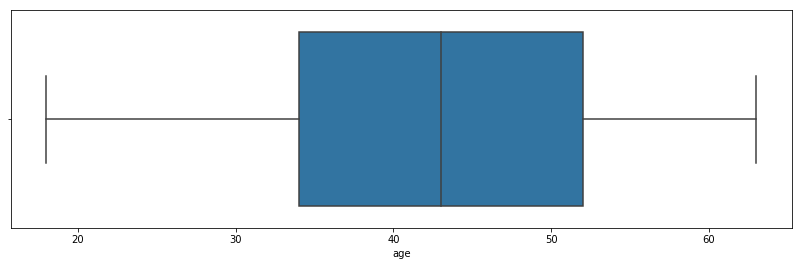

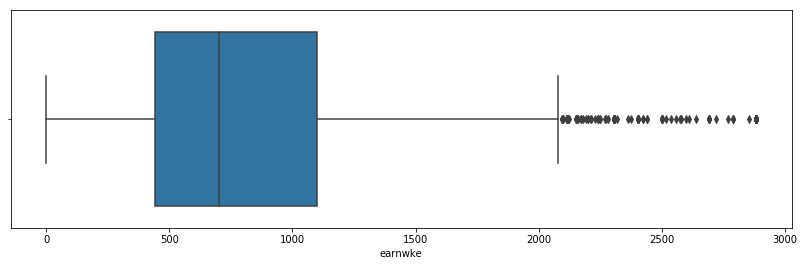

In [49]:
# Selecting continuous features
continuous_features = ['age', 'earnwke']
# Drawing Box Plots with outliers for selected features
for feature in continuous_features:
    plt.figure(figsize=(14, 4))
    sns.boxplot(data[feature])

Beim Alter der befragten Arbeiter gibt es keine Ausreißer. Die Ausreißer beim wöchentlichen Einkommen liegen so nah beieinander, dass sie nicht auffällig wirken.

## Verteilung der Zielvariable

###### Analyse

Bevor Aussagen über die Verteilung der Zielvariable gemacht werden, soll analysiert überprüft werden, ob inkonsistente oder unvollständige Datensätze bezüglich der Zielvariable vorliegen.

In [50]:
# Number of objects with contradiction (employed and unemployed)
data[(data['employed']==1) & (data['unemployed']==1)].count()[0]

0

Es gibt keine Datenobjekte, die eine ungültige Beschäftigungsinformation enthalten, bei welcher der Arbeiter gleichzeitig beschäftigt und nicht beschäftigt ist.

In [51]:
# Are there objects with no information (not employed and not unemployed)
data[(data['employed']==0) & (data['unemployed']==0)].count()[0]

435

Es gibt 435 Datenobjekte, die keine Information über den Beschäftigungsstatus 2009 enthalten. Diese sollten bei der Datenvorverarbeitung entfernt werden, da sie zum Trainieren / Testen nicht verwendet werden können.

###### Graphische Darstellung

Ermitteln der Daten für die graphische Darstellung.

In [52]:
# Preparing values for the barplot
employed = data[data['employed']==1].count()[0]
unemployed = data[data['unemployed']==1].count()[0]
no_information = data[(data['employed']==0) & (data['unemployed']==0)].count()[0]

Graphische Darstellung der Verteilung mithilfe von `seaborn` und einem neuen `dataframe` zur Beschriftung der Achsen.

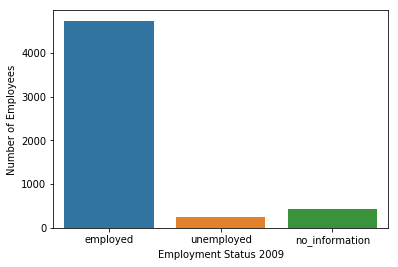

In [53]:
# Instanciating a new dataframe to have a nice barplot with descriptions
plot_data = pd.DataFrame({'Employment Status 2009': ['employed', 'unemployed', 'no_information'], 
                          'Number of Employees': [employed, unemployed, no_information]})
# Draw the barplot with seaborn
ax = sns.barplot(x='Employment Status 2009', y='Number of Employees', data=plot_data, ci=None)

Erkenntnis: Die Zielvariable ist sehr ungleich verteilt.

Anmerkung: Datenobjekte ohne Beschäftigungsstatus 2009 werden bei der Datenvorverarbeitung entfernt, da sie zum Trainieren / Testen nicht verwendet werden können.

###### Ermittlung der prozentualen Verteilung der Zielvariable

In [54]:
# Ratio of employed workers (without datapoints with no information)
employed / (employed + unemployed)

0.951979103877838

Erkenntnis: Nur ungefähr 5% der Arbeiter hatten im Jahr 2008 keine Beschäftigung mehr. Hierbei handelt es sich also um einen unbalancierten Datensatz.

## Datenvorverarbeitung

In diesem Abschnitt werden die Daten in Hinblick auf das Training der Modelle vorverarbeitet.

###### 1. Entfernen der Datenobjekte ohne Beschäftigungsinformation 2009

In [55]:
# Determine rows with no information about Employment Status 2009
rows_no_onformation = data[(data['employed']==0) & (data['unemployed']==0)]

# Drop those rows with no information
data.drop(rows_no_onformation.index, inplace=True)

Neue Größe des Datensatzes überprüfen

In [56]:
# New size of the dataframe
data.shape

(4977, 21)

###### 2. Trennen der unabhängigen Daten (`X`) von den abhängigen Daten (Zielvariable `y`)

Mermale `X` sind alle Daten außer die Spalten der Zielvariable:

In [57]:
# Don't include Employment Information 2009 in the features
X = data.drop(['employed', 'unemployed'], axis=1)

Überprüfen, ob die Spalten der Zielvariable entfernt wurde.

In [58]:
# Check if Employment Information was removed by printing out the feature columns
X.columns

Index(['age', 'race', 'earnwke', 'married', 'union', 'ne_states', 'so_states',
       'ce_states', 'we_states', 'government', 'private', 'self', 'educ_lths',
       'educ_hs', 'educ_somecol', 'educ_aa', 'educ_bac', 'educ_adv', 'female'],
      dtype='object')

Erstellen der Zielvaribale `y`.

In [59]:
# Output variable is the Employment Information 2009
y = data[['employed', 'unemployed']]

###### 3. Fehlende Daten in der Spalte `earnwke` ergänzen

Fehlende Daten sollen durch das durchschnittliche Einkommen ersetzt werden.  

Anmerkung: Dieses Vorgehen könnte problematisch sein, da nur bei Selbstständige Arbeitern diese Angabe fehlt, was die folgende Zelle zeigt.

In [60]:
print("Number of missing earnwke values:\t\t", X[X['earnwke'].isnull()].shape[0])
print("Number of missing earnwke values where self==1:\t", X[X['earnwke'].isnull()]['self'].value_counts()[1])

Number of missing earnwke values:		 570
Number of missing earnwke values where self==1:	 570


Dennoch sollen aus Mangel an besseren Optionen diese fehlenden Werte durch das durchschnittliche Einkommen ersetzt werden:

In [61]:
# Instanciate SimpleImputer with np.nan and strategy 'mean' (replaces missing values with mean)
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')

# Fit the Imputer on the data and transform it
X[["earnwke"]] = imputer.fit_transform(X[["earnwke"]].to_numpy())

Überprüfen, ob fehlende Werte ersetzt wurden.

In [62]:
# Check if missing values are replaced
X[["earnwke"]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4977 entries, 0 to 5411
Data columns (total 1 columns):
earnwke    4977 non-null float64
dtypes: float64(1)
memory usage: 77.8 KB


Das Ersetzen der Werte war erfolgreich.

###### 4. Überprüfen der One-Hot encodierten Daten

Bei One-Hot enkodierten Daten können Inkonsistenzen auftreten. Das Modul `one_hot.py` enthält eine Funktion namens `is_one_hot_encoded`, die solche Inkonsistenzen erkennen kann. Die folgende Zelle überprüft die one-hot-enkodierten Informationen mithilfe dieser Funkion auf Inkonsistenzen.

In [63]:
# Check columns for correct one-hot encoding
[ one_hot.is_one_hot_encoded(X[['ne_states', 'so_states', 'ce_states', 'we_states']]),
  one_hot.is_one_hot_encoded(X[['government', 'private', 'self']]),
  one_hot.is_one_hot_encoded(X[['educ_lths', 'educ_hs', 'educ_somecol', 'educ_aa', 'educ_bac', 'educ_adv']])]

[True, True, True]

Erkenntnis: Die Informatioen über _Bundesstaats-Angehörigkeit_, _Beschäftigungsverhältnis_ und _höchster Abschluss_ sind korrekt und vollständig One-Hot-Enkodiert. Es gibt keine Widersprüchlichkeiten oder fehlende Informationen.

Da das Merkmal _höchster Abschluss_ kategorisch-ordinal ist, kann man dieses in einer Variable kodieren, was in der folgenden Zelle geschieht. Dafür wird die Funktion `one_hot_to_ordinal`verwendet, die ebenfalls im Modul `one_hot.py` enthalten ist.

Die anderen one-hot-enkodierten kategorischen Merkmale sollten nicht umgewandelt werden, da sie nicht ordinal sind.

In [64]:
# Create the 'educ' column on basis of the 'educ_' columns
X['educ'] = one_hot.one_hot_to_ordinal(X[['educ_lths', 'educ_hs', 'educ_somecol', 'educ_aa', 'educ_bac', 'educ_adv']])
X = X.drop(['educ_lths', 'educ_hs', 'educ_somecol', 'educ_aa', 'educ_bac', 'educ_adv'], axis=1)

# Create the 'employment' column on basis of the corresponding columns
# X['employment'] = one_hot_to_ordinal(X[['self', 'government', 'private']])
# X = X.drop(['self', 'government', 'private'], axis=1)

# Create the 'state' column on basis of the corresponding columns
# X['state'] = one_hot_to_ordinal(X[['ne_states', 'so_states', 'ce_states', 'we_states']])
# X = X.drop(['ne_states', 'so_states', 'ce_states', 'we_states'], axis=1)

Überprüfen, ob die Spalte `educ` hinzugefügt wurde und die anderen Spalten entfernt wurden.

In [65]:
# Check column names
X.columns

Index(['age', 'race', 'earnwke', 'married', 'union', 'ne_states', 'so_states',
       'ce_states', 'we_states', 'government', 'private', 'self', 'female',
       'educ'],
      dtype='object')

Überprüfen, ob die Zielvariable ohne Inkonsistenzen one-hot encodiert ist:

In [66]:
# Check if output variable is one-hot encoded
one_hot.is_one_hot_encoded(y[['employed', 'unemployed']])

True

Erkenntnis: Das Entfernen der Datenobjekte mit fehlenden Informationen über das _Beschäftigungsstatus 2009_ (Schritt 1) hat funktioniert.

Die Spalte `unemployed` kann jetzt entfertn werden, da sie gegenüber der Spalte `employed` keine neuen Informationen enthält:

In [67]:
# Removing the column `unemployed` from y
y = y.drop(['unemployed'], axis=1)

# Check if it worked
y.columns

Index(['employed'], dtype='object')

Das Entfernen der Spalte `unemployed` war erfolgreich.

###### 5. One-Hot Enkodierung

Die Information über die selbstidentifizierte Rassenzugehörigkeit ist in den Daten numerisch in einer Spalte numerisch enkodiert. Da es sich jedoch um ein Attribut ohne Ordnung handelt (nominal), sollte diese Information one-hot-enkodiert werden. Dies geschieht in der folgenden Zelle:

In [68]:
# Compute one-hot encoded columns
race_one_hot = pd.get_dummies(data["race"])

# Remove original column
X = X.drop(['race'], axis=1)

# Add one-hot encoded columns
X['race_white'], X['race_black'], X['race_other'] = race_one_hot[1], race_one_hot[2], race_one_hot[3]

Überprüfuen, ob die entsprechenden Spalten hinzugefügt wurden:

In [69]:
# Check if it worked
X.columns

Index(['age', 'earnwke', 'married', 'union', 'ne_states', 'so_states',
       'ce_states', 'we_states', 'government', 'private', 'self', 'female',
       'educ', 'race_white', 'race_black', 'race_other'],
      dtype='object')

Erkenntnis: Die Spalten wurden erfolgreich hinzugefügt.

###### 6. Auteilung in Trainings-  und Test-Daten

Auteilen der Daten in Trainings- und Testdaten im Verhältnis 80:20.

In [70]:
# Split into training and test data (random_state for deterministic output)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

###### 7. Feature-Scaling

Da kein Algorithmus verwendet wird, in dem die euklidische Distanz gemessen wird, ist eine Skalierung der Merkmale nicht nötig.

Siehe: https://www.geeksforgeeks.org/python-how-and-where-to-apply-feature-scaling/

## Training und Evaluation

###### Mögliche Methoden

Es handelt sich bei der Entscheidung, ob ein Beschäftigter aus dem Jahr 2008 auch im Jahr 2009 noch beschäftigt ist, um eine Klassifikationsaufgabe. 

Zudem soll bestimmt werden, ob ältere Arbeitskräfte ein ein höheres Risiko für Arbeitslosigkeit im Jahr 2009 haben. 

Deshalb sollte eine Klassifikations-Methode gewählt werden, bei der nach dem Training bestimmt werden kann, welche Features besonders großen Einfluss auf die Klassifikation haben.

Mögliche Methoden hierfür sind unter anderem _Logistische Regression_ und _Entscheidungsbäume_.  
In der Aufgabenstellung sind als Baseline _Lineare Regression_ und _häufigste Klasse_ angegeben.

Aufgrund der Tatsache, dass es sich um einen unbalancierten Datensatz handelt, wird neben der Metrik "accuracy_score" zusätzlich die Metrik "balanced_accuracy_score" verwendet, welche den durschnittlichen Recall auf allen Klassen berechnet und deshalb für unbalancierte Datensätze gut geeignet ist.

Siehe auch: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

Zur Vereinfachung der Anzeige der Metriken definieren wir eine Methode, die beide ausgewählten Metriken berechnet und ausgibt.

In [71]:
# Function to print selected metrics
def print_metrics(y_true, y_pred):
    print("{:30s}{:.3f}".format("Accuracy score:", accuracy_score(y_true, y_pred)))
    print("{:30s}{:.3f}".format("Balanced accuracy score:", balanced_accuracy_score(y_true, y_pred)))

Weiterhin definieren wir eine Funktion zum ausgeben einer einfachen Konfustionsmatrix

In [72]:
# Function to print simple confusion matrix
def print_confusion_matrix(y_true, y_pred):
    print("tn: {}, fp: {}\nfn: {}, tp: {}".format(*confusion_matrix(y_true, y_pred).ravel()))    

###### Baseline: Häufigste Klasse

Als erste Baseline soll das Vorschlagen der am häufigsten Auftretenden Klasse untersucht werden.

In [73]:
# Metrics with Training Data when always predicting employed=1
print_metrics(y_train, np.ones_like(y_train))

Accuracy score:               0.954
Balanced accuracy score:      0.500


In [74]:
# Metrics with Test Data when always predicting employed=1
print_metrics(y_test, np.ones_like(y_test))

Accuracy score:               0.946
Balanced accuracy score:      0.500


Wie erwartet, erreicht man mit der Vorhersage der häufigsten Klasse eine Accuracy von ca. 95% und eine Balanced Accuracy von 0,5. Der Recall für `employed=1` ist nämlich 1 und der Recall für `employed=0` ist 0, was zu einem Durchscnitt von 0,5 führt.

###### Baseline: Lineare Regression

Als zweite Baseline soll ein Klassifikator basierend auf linearer Regression untersucht werden.

In [93]:
# Train linear Regression
model_lir = LinearRegression().fit(X_train, y_train['employed'])

In [76]:
# Define Classification prediction function for linear Regression
def predict_lir(X):
    return model_lir.predict(X) >= 0.95

In [77]:
# Metrics on Training Data
print_metrics(y_train, predict_lir(X_train))

Accuracy score:               0.561
Balanced accuracy score:      0.644


In [78]:
# Metrics on Test Data
print_metrics(y_test, predict_lir(X_test))

Accuracy score:               0.553
Balanced accuracy score:      0.633


Die Metriken zeigen für den Klassifikator basierend auf linearer Regression bessere Ergebnisse (Balanced Accuracy von 64%) als für den Klassifikator, der Objekte immer der häufigsten Klasse zuordnet.

In [79]:
# Print confusion Matrix
print_confusion_matrix(y_test, predict_lir(X_test))

tn: 39, fp: 15
fn: 430, tp: 512


Die Konfusionsmatrix bestätigt, dass einige Datenobjekte auch negativ klassifiziert werden.

###### Logistische Regression 

In den folgenden Zellen wird ein Klassifikator trainiert, der auf logistischer Regression basiert. 

In [117]:
# Use fit_regularized to train the model (can deal better with one-hot encoded columns)
logistic_regression = smf.Logit(y_train, sm.add_constant(X_train)).fit_regularized()

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.17613888605326397
            Iterations: 85
            Function evaluations: 95
            Gradient evaluations: 85


In [103]:
# Define Classification prediction function for logistic Regression
def predict_lr(X):
    return logistic_regression.predict(sm.add_constant(X)) > 0.95

In [104]:
# Metrics on Training Data
print_metrics(y_train, predict_lr(X_train))

Accuracy score:               0.632
Balanced accuracy score:      0.648


In [105]:
# Metrics on Test Data
print_metrics(y_test, predict_lr(X_test))

Accuracy score:               0.631
Balanced accuracy score:      0.656


In [106]:
# Print confusion Matrix
print_confusion_matrix(y_test, predict_lr(X_test))

tn: 37, fp: 17
fn: 351, tp: 591


Auch wenn die Accuracy bei der logistischen Regression schlechter ist, zeigt die Metrik "Balanced Accuracy" Ergebnisse als die beiden Baseline-Methoden. Dies ist auch anhand der Konfusionsmatrix zu erkennen.

###### Entscheidungsbaum (Decision Tree)

Als weitere mögliche Klassifikations-Methode soll ein Entscheidungsbaum untersucht werden, bei der Parameter `class_weight = 'balanced'` gesetzt wird, da es ich um einen unbalanvierten Datensatz handelt.

In [85]:
# Train decision tree classifier with balanced class weight
model_dt = DecisionTreeClassifier(class_weight = 'balanced').fit(X_train, y_train)

In [86]:
# Metrics on Training Data
print_metrics(y_train, model_dt.predict(X_train))

Accuracy score:               0.999
Balanced accuracy score:      1.000


In [87]:
# Metrics on Test Data
print_metrics(y_test, model_dt.predict(X_test))

Accuracy score:               0.906
Balanced accuracy score:      0.496


Die Metriken zeigen für den Klassifikator basierend auf einem Entscheidungsbaum, dass er zwar sehr gut gelernt hat, die Trainingsdaten zu klassifizieren, jedoch auf den Testdaten eine schlechtere Accuracy hat. Zudem ist die Balanced Accuracy auf den Testdaten sogar leicht schlechter als bei der Baseline.

Dieses Phänomen nennt man Overfitting.

###### Random Forest (Decision Trees)

Als weitere mögliche Klassifikations-Methode soll ein Random Forest untersucht werden, bei dem ebenfalls der Parameter `class_weight = 'balanced'` gesetzt wird, da es ich um einen unbalanvierten Datensatz handelt.

In [88]:
# Train decision tree classifier with balanced class weight
from sklearn.ensemble import RandomForestClassifier
model_dt = RandomForestClassifier(n_estimators=10, class_weight = 'balanced').fit(X_train, y_train['employed'])

In [89]:
# Metrics on Training Data
print_metrics(y_train, model_dt.predict(X_train))

Accuracy score:               0.994
Balanced accuracy score:      0.946


In [90]:
# Metrics on Test Data
print_metrics(y_test, model_dt.predict(X_test))

Accuracy score:               0.936
Balanced accuracy score:      0.495


Die Metriken zeigen für den Klassifikator basierend auf einem Random Forest die gleichen Ergebnisse wie für den einzelnen Entscheidungsbaum (Overfitting).

## Schlussfolgerungen

###### Haben ältere Arbeitskräfte ein höheres Risiko für Arbeitslosigkeit während der Finanzkrise 2008-2009?

Um diese Frage zu beantworten, wird im Folgenden das beste Modell verwendet, um zu bestimmen, wie groß der Einfluss der einzelnen Merkmale auf die Zielvariable ist. Dabei handelt es sich um den Klassifikator basierend auf "Logistischer Regression".

Aus dem Klassifikator lässt sich für jedes Merkmal ein P-Wert ablesen. Ein niedriger P-Wert (< 0.05) bedeutet, dass die Hypothese, dass das Merkmal keinen Einfluss hat, verworfen werden kann.

Siehe auch: https://blog.minitab.com/blog/adventures-in-statistics-2/how-to-interpret-regression-analysis-results-p-values-and-coefficients

Die folgende Tabelle zeigt für jedes Merkmal dessen P-Wert an (in der 5. Spalte).

In [118]:
feature_table = logistic_regression.summary2().tables[1].round(4)
feature_table

,Coef.,Std.Err.,z,P>|z|,[0.025,0.975]
const,1.5208,NaN,NaN,NaN,NaN,NaN
age,-0.0051,6.900000e-03,-0.7372,0.4610,-1.860000e-02,8.400000e-03
earnwke,0.0002,2.000000e-04,1.3352,0.1818,-1.000000e-04,6.000000e-04
married,0.6133,1.610000e-01,3.8093,0.0001,2.977000e-01,9.288000e-01
union,-0.3768,2.367000e-01,-1.5921,0.1114,-8.407000e-01,8.710000e-02
ne_states,0.4401,4.311367e+06,0.0000,1.0000,-8.450124e+06,8.450125e+06
so_states,0.3065,4.363031e+06,0.0000,1.0000,-8.551384e+06,8.551384e+06
ce_states,0.4371,4.410400e+06,0.0000,1.0000,-8.644225e+06,8.644226e+06
we_states,0.3068,4.188369e+06,0.0000,1.0000,-8.209052e+06,8.209053e+06
government,1.3438,3.422177e+06,0.0000,1.0000,-6.707342e+06,6.707345e+06


Laut der Tabelle hat das Merkmal `age` einen P-Wert von ca. 0.46. Das bedeutet, dass dieses Merkmal sehr wahrscheinlich keinen Einfluss auf die Zielvariable hat.

Besonders großen Einfluss haben stattdessen die Merkmale `married`, `female` und `educ`.

Die Frage, ob ältere Arbeitskräfte ein höheres Risiko für Arbeitslosigkeit haben, ist daher mit "Nein" zu beantworten.